In [1]:
!pip install scikeras

In [2]:
# !pip install tensorflow-addons

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, History
from scikeras.wrappers import KerasClassifier
from google.colab import drive
import time
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import tensorflow.keras.backend as K
# import tensorflow_addons as tfa
import tensorflow as tf

# Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test_size = 0.9
epochs = 100
batch_size = 32
learning_rate = 0.0001
patience = 10
validation_split = 0.1

In [5]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    f1 = 2 * ((precision_val * recall_val) / (precision_val + recall_val + K.epsilon()))
    return f1

# metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tfa.metrics.F1Score(num_classes=3, average='macro')]
metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]

# **5G Slice Ndd Dataset with Standalone Neural Network**

In [6]:
# Load the preprocessed dataset
data3 = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')

# Separate features and target
X3 = data3.drop('SliceType', axis=1)
y3 = data3['SliceType']

# Encode target labels
le = LabelEncoder()
y3_encoded = le.fit_transform(y3)
y3 = to_categorical(y3_encoded)

# Scale features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the features
X3_scaled = scaler.fit_transform(X3)

# Convert back to DataFrame for easier handling
X3 = pd.DataFrame(X3_scaled, columns=X3.columns)

# Split the data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=test_size, random_state=42)

###############################################################################################################
# Build the neural network model
model3 = Sequential()
model3.add(Dense(64, input_dim=X3.shape[1], activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(y3.shape[1], activation='softmax'))

###############################################################################################################

# Compile the model with custom metrics
# model3.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy', recall, precision, f1_score])
model3.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=metrics)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

# Create a history object to store training metrics
history3 = History()

# start time
start_time_neural_network = time.time()

# Train the model with early stopping and history callbacks
model3.fit(X3_train, y3_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, callbacks=[early_stopping, history3])

# end time
end_time_neural_network = time.time()

latency_neural_network = end_time_neural_network - start_time_neural_network
print(f"\n Standalone Neural Network --- Latency: {latency_neural_network} seconds - Training Accuracy: {history3.history['accuracy'][-1]:.4f} - Validation Accuracy: {history3.history['val_accuracy'][-1]:.4f} \n")

# Evaluate the model
# loss3, accuracy3, recall3, precision3, f1_score3 = model3.evaluate(X3_test, y3_test)
# print(f"Test Accuracy: {accuracy3:.4f} - Test Loss: {loss3:.4f} - Test Recall: {recall3:.4f} - Test Precision: {precision3:.4f} - Test F1-Score: {f1_score3:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.3894 - loss: 4.7836 - precision: 0.3889 - recall: 0.3120 - val_accuracy: 0.5862 - val_loss: 1.6096 - val_precision: 0.4937 - val_recall: 0.2690
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4367 - loss: 5.2390 - precision: 0.4412 - recall: 0.3437 - val_accuracy: 0.6966 - val_loss: 1.2781 - val_precision: 0.6463 - val_recall: 0.3655
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4730 - loss: 3.9132 - precision: 0.4713 - recall: 0.3756 - val_accuracy: 0.7172 - val_loss: 1.0637 - val_precision: 0.6628 - val_recall: 0.3931
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4914 - loss: 3.7433 - precision: 0.5103 - recall: 0.3910 - val_accuracy: 0.7172 - val_loss: 0.8935 - val_precision: 0.6966 - val_recall: 0.4276
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4662 - loss: 3.2289 - precision: 0.4855 - recall: 0.3498 - val_accuracy: 0.7655 - val_loss: 0.7534

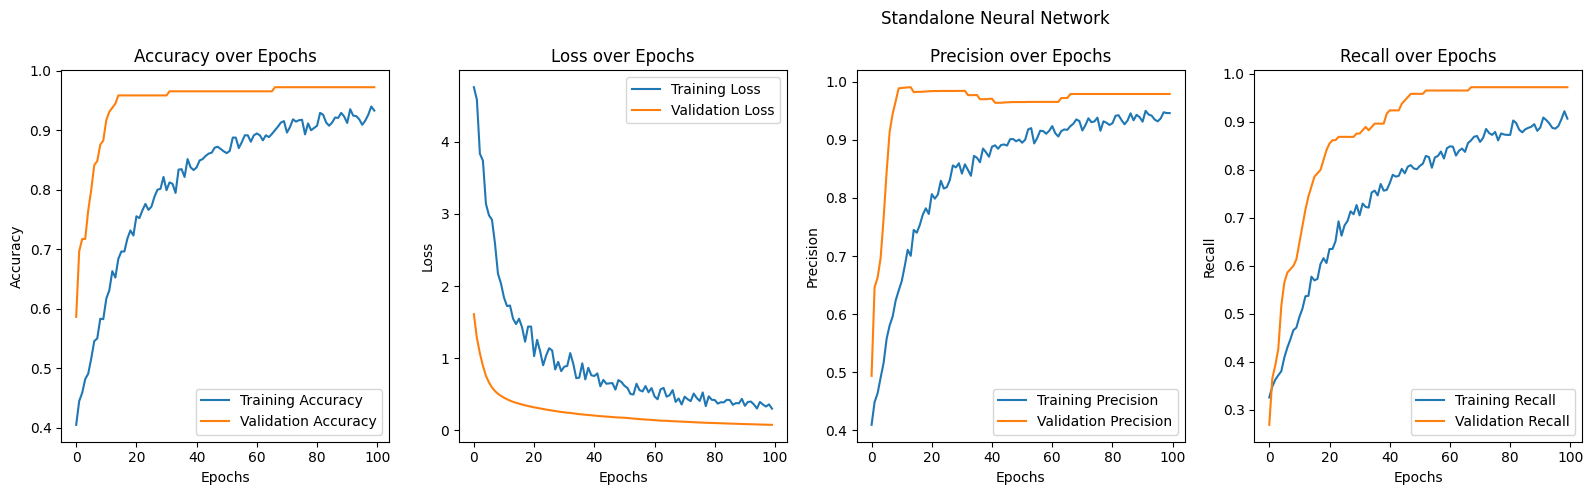

In [7]:
# Retrieve metrics from the history object
train_acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

train_loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

train_precision3 = history3.history['precision']
val_precision3 = history3.history['val_precision']

train_recall3 = history3.history['recall']
val_recall3 = history3.history['val_recall']

# train_f13 = history3.history['f1_score']
# val_f13 = history3.history['val_f1_score']

# Print metrics for each epoch
# for epoch in range(len(train_acc3)):
#     print(f"Epoch {epoch+1}:")
#     print(f"  Training Accuracy: {train_acc3[epoch]:.4f}, Validation Accuracy: {val_acc3[epoch]:.4f}")
#     print(f"  Training Loss: {train_loss3[epoch]:.4f}, Validation Loss: {val_loss3[epoch]:.4f}")
#     print(f"  Training Precision: {train_precision3[epoch]:.4f}, Validation Precision: {val_precision3[epoch]:.4f}")
#     print(f"  Training Recall: {train_recall3[epoch]:.4f}, Validation Recall: {val_recall3[epoch]:.4f}")
#     print(f"  Training F1 Score: {train_f13[epoch]:.4f}, Validation F1 Score: {val_f13[epoch]:.4f}")


# Plot accuracy and loss over epochs
plt.figure(figsize=(20, 5))
plt.suptitle('Standalone Neural Network')

plt.subplot(1, 5, 1)
plt.plot(train_acc3, label='Training Accuracy')
plt.plot(val_acc3, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 5, 2)
plt.plot(train_loss3, label='Training Loss')
plt.plot(val_loss3, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(train_precision3, label='Training Precision')
plt.plot(val_precision3, label='Validation Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 5, 4)
plt.plot(train_recall3, label='Training Recall')
plt.plot(val_recall3, label='Validation Recall')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# plt.subplot(1, 5, 5)
# plt.plot(train_f13, label='Training F1 Score')
# plt.plot(val_f13, label='Validation F1 Score')
# plt.title('F1 Score over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# # Predict on the test set
# y_pred3 = model3.predict(X3_test)

# # Convert predictions to class labels
# y_pred3_class = np.argmax(y_pred3, axis=1)
# y_test_class = np.argmax(y3_test, axis=1)

# # Calculate precision, recall, and F1 score
# precision = precision_score(y_test_class, y_pred3_class, average='macro')
# recall = recall_score(y_test_class, y_pred3_class, average='macro')
# f1 = f1_score(y_test_class, y_pred3_class, average='macro')

# # Calculate confusion matrix
# conf_mat = confusion_matrix(y_test_class, y_pred3_class)

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print("Confusion Matrix:")
# print(conf_mat)

# **Base Model using Neural Network on DeepSlice Dataset**

In [9]:
# Load deepslice_data.csv
data1 = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')

# Data pre-processing
# Feature Conversion - Categorical to Numerical
one_hot_encoded_data1 = pd.get_dummies(data1, columns = ['Day','Use Case', 'Technology Supported', 'GBR'])
data1_ohe = one_hot_encoded_data1.rename(columns={'Day_sunday':'sunday','Day_monday':'monday','Day_tuesday':'tuesday','Day_wednesday':'wednesday','Day_thrusday':'thrusday','Day_friday':'friday','Day_saturday':'saturday','Use Case_AR/VR/Gaming':'AR/VR/Gaming','Use Case_Healthcare':'Healthcare','Use Case_Industry 4.0':'Industry 4.0','Use Case_IoT Devices':'IoT Devices','Use Case_Public Safety':'Public Safety','Use Case_Smart City & Home':'Smart City & Home','Use Case_Smart Transportation':'Smart Transportation','Use Case_Smartphone':'Smartphone','Technology Supported_IoT(LTE-M, NB-IoT)':'IoT','Technology Supported_LTE/5G':'LTE/5G','GBR_GBR':'GBR','GBR_Non-GBR':'Non-GBR'})
data1 = data1_ohe[['LTE/5g Category', 'Time', 'sunday', 'monday', 'tuesday', 'wednesday', 'thrusday', 'friday', 'saturday', 'Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone', 'slice Type']]

# Replace boolean values with 0 and 1 in specified columns
columns_to_convert = ['sunday', 'monday', 'tuesday', 'wednesday', 'thrusday', 'friday', 'saturday', "IoT", "LTE/5G", "GBR", "Non-GBR", "AR/VR/Gaming", "Healthcare", "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
for column in columns_to_convert:
    data1[column] = data1[column].replace({False: 0, True: 1})

data1 = data1.drop_duplicates()

X1 = data1.drop('slice Type', axis=1)
y1 = data1['slice Type']

# Encode target labels if necessary
le = LabelEncoder()
y1_encoded = le.fit_transform(y1)

# Scale features
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Split data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1_encoded, test_size=0.2, random_state=42)

##################################################################################################
# Create a new model with input layer
model1 = Sequential()
model1.add(Dense(64, input_dim=X1_scaled.shape[1], activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(len(np.unique(y1_encoded)), activation='softmax'))

#################################################################################################

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create a history object to store training metrics
history1 = History()

# start time
start_time_base_model1_training = time.time()

# Train the model on new data
model1.fit(X1_train, y1_train, epochs=10, batch_size=32, validation_split=0.5, callbacks=[early_stopping, history1])

# end time
end_time_base_model1_training = time.time()

latency_base_model1_training = end_time_base_model1_training - start_time_base_model1_training
print(f"\n Latency for base model1 training: {latency_base_model1_training} seconds")

# Evaluate on test set
loss1, accuracy1 = model1.evaluate(X1_test, y1_test)
print(f"Test Accuracy: {accuracy1:.4f}")

# Save the trained model if needed
model1.save('deep_slice_model.h5')

<ipython-input-9-4cfa66338ea2>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1[column] = data1[column].replace({False: 0, True: 1})
<ipython-input-9-4cfa66338ea2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[column] = data1[column].replace({False: 0, True: 1})


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


790/790 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3133 - loss: 1.3265 - val_accuracy: 0.3554 - val_loss: 1.0575
Epoch 2/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3811 - loss: 1.1943 - val_accuracy: 0.5664 - val_loss: 0.9436
Epoch 3/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4547 - loss: 1.0776 - val_accuracy: 0.7506 - val_loss: 0.8490
Epoch 4/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5257 - loss: 0.9794 - val_accuracy: 0.8397 - val_loss: 0.7660
Epoch 5/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5791 - loss: 0.9087 - val_accuracy: 0.8891 - val_loss: 0.6889
Epoch 6/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6366 - loss: 0.8244 - val_accuracy: 0.9157 - val_loss: 0.6163
Epoch 7/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6762 - loss: 0.7634 - val_accuracy: 0.9366 - val_loss: 0.5467
Epoch 8/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7070 - loss: 0.7005 - val_accuracy: 0.9555 - val_

Test Accuracy: 0.9755


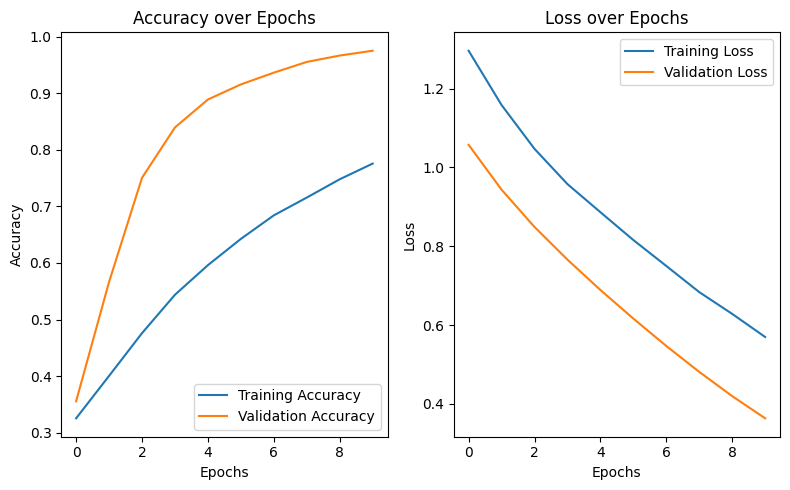

In [10]:
# Retrieve metrics from the history object
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Print metrics for each epoch
# for epoch in range(len(train_acc)):
#     print(f"Epoch {epoch+1}:")
#     print(f"  Training Accuracy: {train_acc[epoch]:.4f}, Validation Accuracy: {val_acc[epoch]:.4f}")
#     print(f"  Training Loss: {train_loss[epoch]:.4f}, Validation Loss: {val_loss[epoch]:.4f}")

# Plot accuracy and loss over epochs
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Transfer Learning on 5G Slice Ndd Dataset**

In [11]:
# Load deepslice_data.csv
data2 = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')

# Data pre-processing
# Separate features and target
X2 = data2.drop('SliceType', axis=1)
y2 = data2['SliceType']

# Encode target labels
le = LabelEncoder()
y2_encoded = le.fit_transform(y2)
y2 = to_categorical(y2_encoded)

# Scale features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the features
X2_scaled = scaler.fit_transform(X2)

# Convert back to DataFrame for easier handling
X2 = pd.DataFrame(X2_scaled, columns=X2.columns)

# Split the data
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = X3_train, X3_test, y3_train, y3_test

##################################################################################################
# Load pre-trained model
model1 = load_model('deep_slice_model.h5')

# Freeze layers if needed
# for layer in model_pt.layers[:-2]:  # Freeze all but last layer
#     layer.trainable = False

# Create a new model with adjusted input layer
model2 = Sequential()

# Add a new input layer with the correct shape
model2.add(Dense(64, activation='relu', input_shape=(X2_train.shape[1],)))

# Add layers from the pre-trained model (excluding the input layer)
for layer in model1.layers[1:]:
    model2.add(layer)

#################################################################################################

# Compile the model
model2.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=metrics)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

# Create a history object to store training metrics
history2 = History()

# start time
start_time_transfer_learning = time.time()

# epoch = 0
# while epoch >= 0:
for epoch in range(int(epochs*1.5)):
  # Train the model on new data
  print(f"\n Epoch: {epoch+1}")
  model2.fit(X2_train, y2_train, epochs=1, batch_size=batch_size, validation_split=validation_split, callbacks=[early_stopping, history2])

  # end time
  end_time_transfer_learning = time.time()

  latency_transfer_learning = end_time_transfer_learning - start_time_transfer_learning

  print("\n latency_transfer_learning:", latency_transfer_learning, "\t latency_neural_network:", latency_neural_network, "\n")

  should_stop_training = latency_transfer_learning >= latency_neural_network
  if should_stop_training:
    print("\n Training stopped as latency limit is reached")
    break
  # epoch += 1

print(f"\n Transfer Learning --- Latency: {latency_transfer_learning} seconds - Training Accuracy: {history2.history['accuracy'][-1]:.4f} - Validation Accuracy: {history2.history['val_accuracy'][-1]:.4f} \n")
print(f"\n Standalone Neural Network --- Latency: {latency_neural_network} seconds - Training Accuracy: {history3.history['accuracy'][-1]:.4f} - Validation Accuracy: {history3.history['val_accuracy'][-1]:.4f} \n")

# Evaluate on test set
# loss2, accuracy2 = model2.evaluate(X2_test, y2_test)
# print(f"Test Accuracy: {accuracy2:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 Epoch: 1
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3689 - loss: 3.0368 - precision: 0.5574 - recall: 0.4465 - val_accuracy: 0.6552 - val_loss: 0.7533 - val_precision: 0.8108 - val_recall: 0.4138

 latency_transfer_learning: 2.415637731552124 	 latency_neural_network: 42.03411364555359 


 Epoch: 2
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4228 - loss: 2.9943 - precision: 0.4506 - recall: 0.3207 - val_accuracy: 0.7379 - val_loss: 0.6511 - val_precision: 0.8831 - val_recall: 0.4690

 latency_transfer_learning: 2.691382884979248 	 latency_neural_network: 42.03411364555359 


 Epoch: 3
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4882 - loss: 2.6301 - precision: 0.5292 - recall: 0.3717 - val_accuracy: 0.8069 - val_loss: 0.5891 - val_precision: 0.9342 - val_recall: 0.4897

 latency_transfer_learning: 3.071404218673706 	 latency_neural_network: 42.03411364555359 


 Epoch: 4
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4574 - loss: 2.8801 - precision:

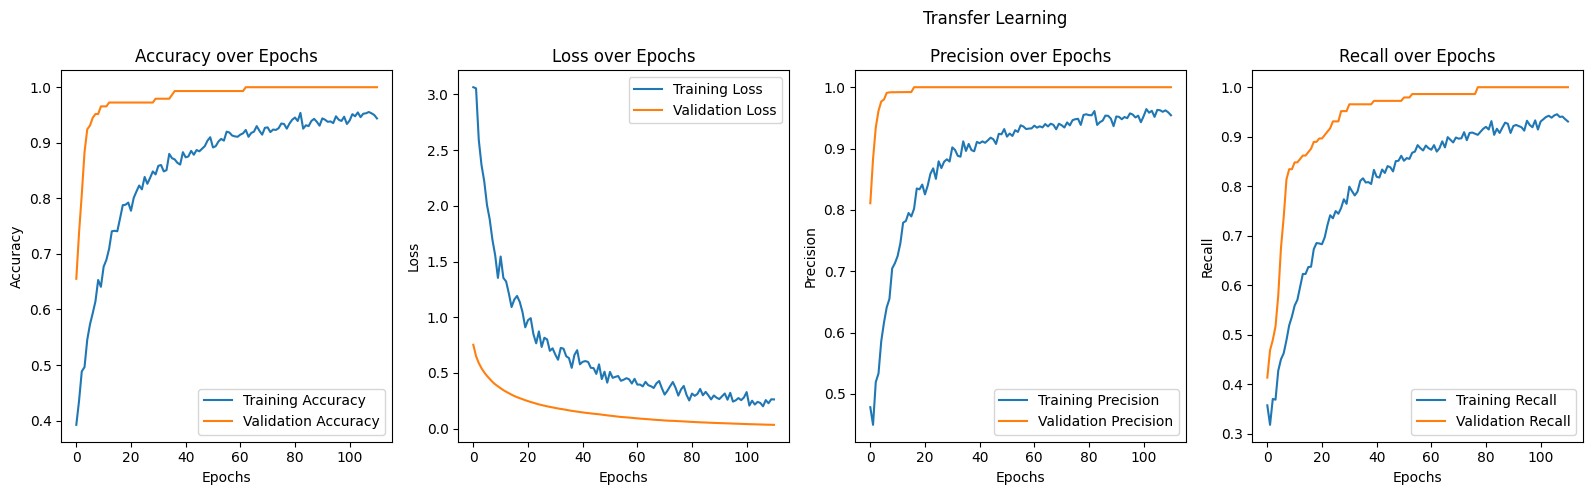

In [12]:
# Retrieve metrics from the history object
train_acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

train_precision2 = history2.history['precision']
val_precision2 = history2.history['val_precision']

train_recall2 = history2.history['recall']
val_recall2 = history2.history['val_recall']

# train_f12 = history2.history['f1_score']
# val_f12 = history2.history['val_f1_score']

# Print metrics for each epoch
# for epoch in range(len(train_acc2)):
#     print(f"Epoch {epoch+1}:")
#     print(f"  Training Accuracy: {train_acc2[epoch]:.4f}, Validation Accuracy: {val_acc2[epoch]:.4f}")
#     print(f"  Training Loss: {train_loss2[epoch]:.4f}, Validation Loss: {val_loss2[epoch]:.4f}")
#     print(f"  Training Precision: {train_precision2[epoch]:.4f}, Validation Precision: {val_precision2[epoch]:.4f}")
#     print(f"  Training Recall: {train_recall2[epoch]:.4f}, Validation Recall: {val_recall2[epoch]:.4f}")
#     print(f"  Training F1 Score: {train_f12[epoch]:.4f}, Validation F1 Score: {val_f12[epoch]:.4f}")


# Plot accuracy and loss over epochs
plt.figure(figsize=(20, 5))
plt.suptitle('Transfer Learning')

plt.subplot(1, 5, 1)
plt.plot(train_acc2, label='Training Accuracy')
plt.plot(val_acc2, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 5, 2)
plt.plot(train_loss2, label='Training Loss')
plt.plot(val_loss2, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(train_precision2, label='Training Precision')
plt.plot(val_precision2, label='Validation Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 5, 4)
plt.plot(train_recall2, label='Training Recall')
plt.plot(val_recall2, label='Validation Recall')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# plt.subplot(1, 5, 5)
# plt.plot(train_f12, label='Training F1 Score')
# plt.plot(val_f12, label='Validation F1 Score')
# plt.title('F1 Score over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.legend()

plt.tight_layout()
plt.show()

# **SYNC NOTEBOOKS**

In [13]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp16_Deep_Slice_NSI_Transfer_Learning.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'

# **Plot**

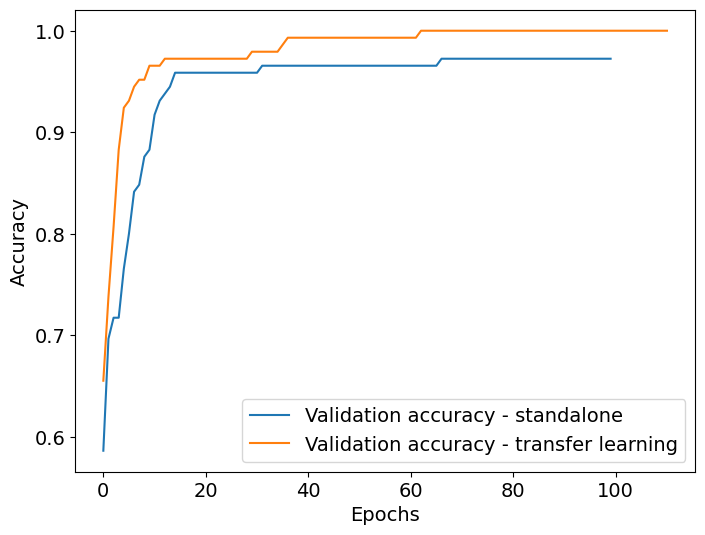

In [14]:
plt.figure(figsize=(8, 6))
# plt.plot(train_acc3, label='Training accuracy - standalone')
plt.plot(val_acc3, label='Validation accuracy - standalone')
# plt.plot(train_acc2, label='Training accuracy - transfer learning')
plt.plot(val_acc2, label='Validation accuracy - transfer learning')
# plt.title('Accuracy over Epochs')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(fontsize=14)

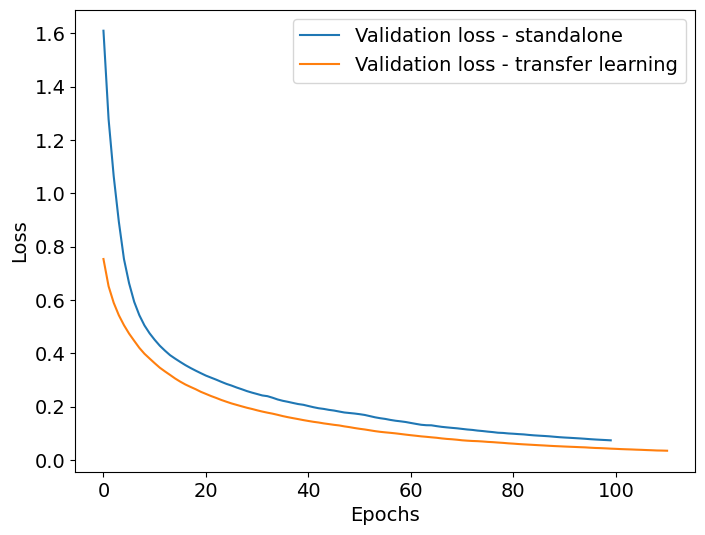

In [15]:
plt.figure(figsize=(8, 6))
# plt.plot(train_loss3, label='Training loss - standalone')
plt.plot(val_loss3, label='Validation loss - standalone')
# plt.plot(train_loss2, label='Training loss - transfer learning')
plt.plot(val_loss2, label='Validation loss - transfer learning')
# plt.title('Loss over Epochs')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(fontsize=14)

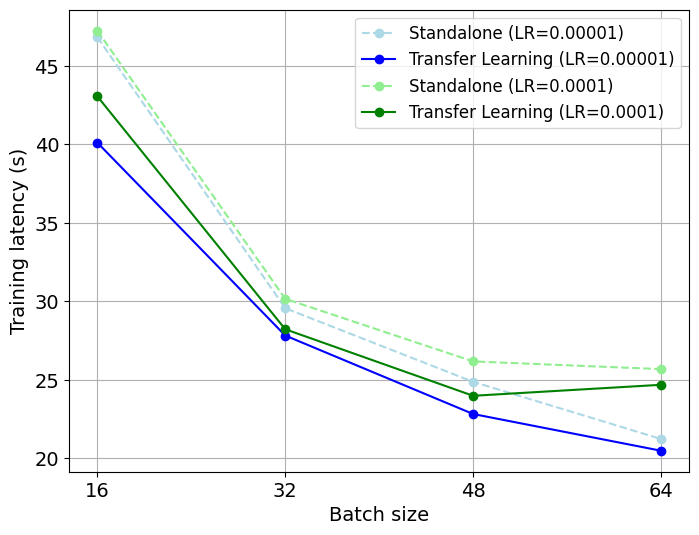

In [16]:
import matplotlib.pyplot as plt

# Data from your table
batch_sizes = [16, 32, 48, 64]

# Latencies (Standalone Network, Transfer Learning)
latency_standalone_00001 = [46.83, 29.56, 24.87, 21.23]  # Learning rate 0.00001
latency_transfer_00001 = [40.11, 27.82, 22.82, 20.48]    # Learning rate 0.00001

latency_standalone_0001 = [47.24, 30.16, 26.17, 25.68]   # Learning rate 0.0001
latency_transfer_0001 = [43.06, 28.22, 23.98, 24.68]     # Learning rate 0.0001

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot for Learning rate 0.00001
ax.plot(batch_sizes, latency_standalone_00001, marker='o', label='Standalone (LR=0.00001)', color='lightblue', linestyle='--')
ax.plot(batch_sizes, latency_transfer_00001, marker='o', label='Transfer Learning (LR=0.00001)', color='blue', linestyle='-')

# Plot for Learning rate 0.0001
ax.plot(batch_sizes, latency_standalone_0001, marker='o', label='Standalone (LR=0.0001)', color='lightgreen', linestyle='--')
ax.plot(batch_sizes, latency_transfer_0001, marker='o', label='Transfer Learning (LR=0.0001)', color='green', linestyle='-')

# Customization
ax.set_xlabel('Batch size', fontsize=14)
ax.set_ylabel('Training latency (s)', fontsize=14)
# ax.set_title('Standalone Network vs Transfer Learning: Latency Comparison')
ax.set_xticks(batch_sizes)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.legend(fontsize=12)

plt.grid(True)
plt.show()

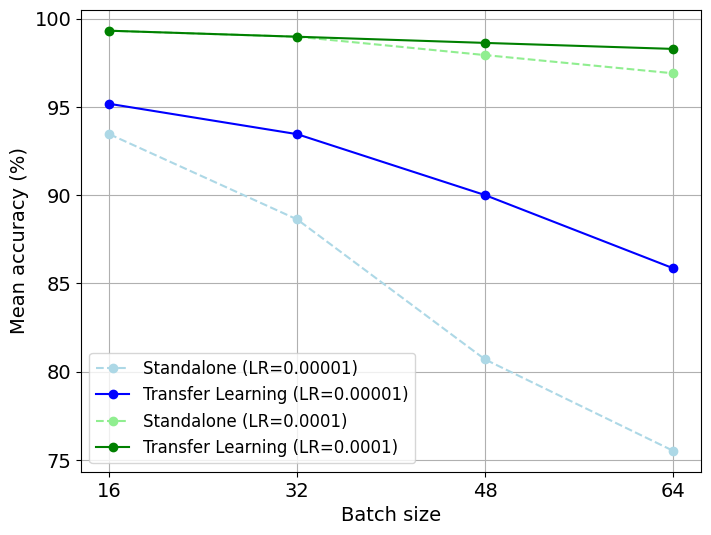

In [17]:
import matplotlib.pyplot as plt

# Data from your table
batch_sizes = [16, 32, 48, 64]

# Latencies (Standalone Network, Transfer Learning)
accuracy_standalone_00001 = [93.45, 88.62, 80.69, 75.52]  # Learning rate 0.00001
accuracy_transfer_00001 = [95.17, 93.45, 90.00, 85.86]    # Learning rate 0.00001

accuracy_standalone_0001 = [99.31, 98.97, 97.93, 96.90]   # Learning rate 0.0001
accuracy_transfer_0001 = [99.31, 98.97, 98.62, 98.28]     # Learning rate 0.0001

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot for Learning rate 0.00001
ax.plot(batch_sizes, accuracy_standalone_00001, marker='o', label='Standalone (LR=0.00001)', color='lightblue', linestyle='--')
ax.plot(batch_sizes, accuracy_transfer_00001, marker='o', label='Transfer Learning (LR=0.00001)', color='blue', linestyle='-')

# Plot for Learning rate 0.0001
ax.plot(batch_sizes, accuracy_standalone_0001, marker='o', label='Standalone (LR=0.0001)', color='lightgreen', linestyle='--')
ax.plot(batch_sizes, accuracy_transfer_0001, marker='o', label='Transfer Learning (LR=0.0001)', color='green', linestyle='-')

# Customization
ax.set_xlabel('Batch size', fontsize=14)
ax.set_ylabel('Mean accuracy (%)', fontsize=14)
# ax.set_title('Standalone Network vs Transfer Learning: Latency Comparison')
ax.set_xticks(batch_sizes)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.legend(fontsize=12)

plt.grid(True)
plt.show()

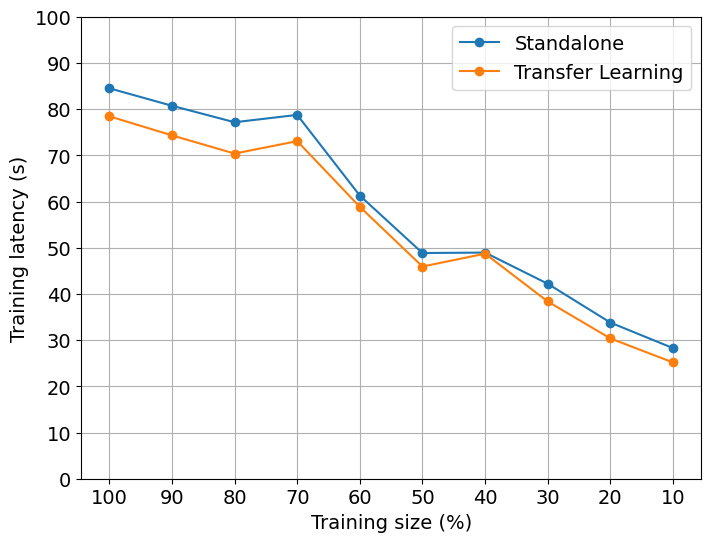

In [18]:
import matplotlib.pyplot as plt

# Data
training_size = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
standalone = [84.51, 80.73, 77.16, 78.75, 61.28, 48.85, 48.95, 42.20, 33.80, 28.27]
transfer_learning = [78.45, 74.32, 70.38, 73.07, 58.85, 45.93, 48.71, 38.36, 30.37, 25.17]

plt.subplots(figsize=(8, 6))

# Create the plot
plt.plot(training_size, standalone, label='Standalone', marker='o')
plt.plot(training_size, transfer_learning, label='Transfer Learning', marker='o')

# Add labels and title
plt.xlabel('Training size (%)', fontsize=14)
plt.ylabel('Training latency (s)', fontsize=14)
# plt.title('Standalone vs Transfer Learning Performance')
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xticks(range(10, 101, 10))
plt.yticks(range(0, 101, 10))
plt.grid(True)

# Add legend
plt.legend(fontsize=14)

# Reverse the x-axis so the values decrease from left to right
plt.gca().invert_xaxis()

# Show the plot
plt.show()

In [19]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp16_Deep_Slice_NSI_Transfer_Learning.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'